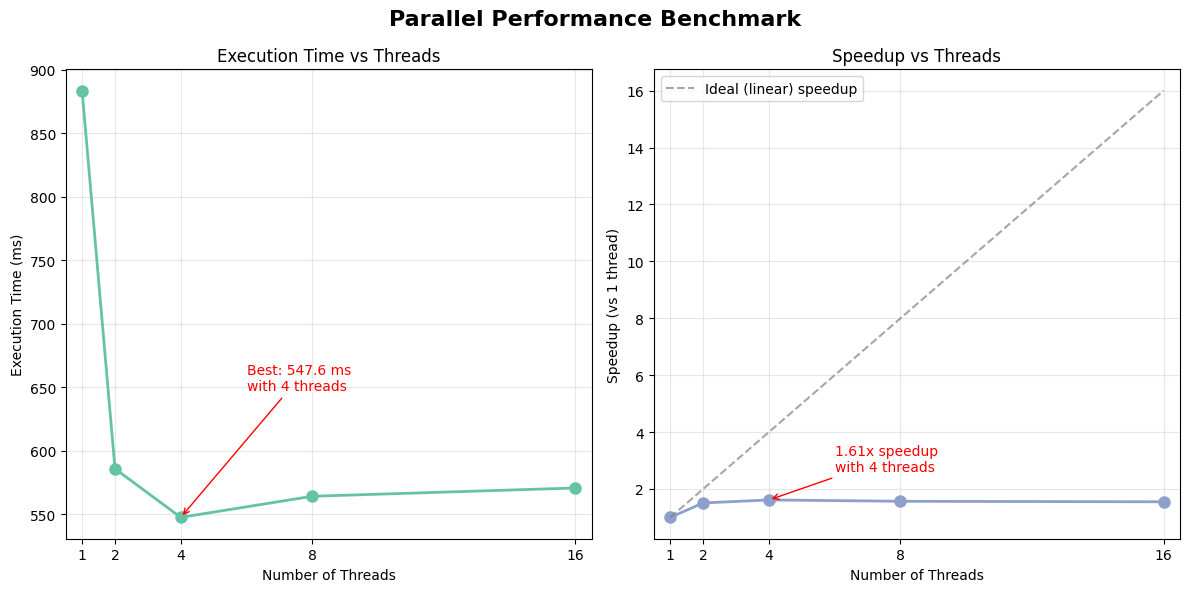

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your screenshot
threads = [1, 2, 4, 8, 16]
times_ms = [883.57, 585.92, 547.60, 564.23, 570.75]

# Calculate speedup relative to 1 thread
speedups = [times_ms[0] / t for t in times_ms]

# Best result annotation
best_threads = 4
best_time = 547.60
best_speedup = speedups[threads.index(best_threads)]

# Plotting
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True)

# Execution time
ax1.plot(threads, times_ms, 'o-', color='#66c2a5', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Threads')
ax1.set_ylabel('Execution Time (ms)')
ax1.set_title('Execution Time vs Threads')
ax1.grid(True, alpha=0.3)
ax1.annotate(f'Best: {best_time} ms\nwith {best_threads} threads',
             xy=(best_threads, best_time), xytext=(best_threads + 2, best_time + 100),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red')

# Speedup
ax2.plot(threads, speedups, 'o-', color='#8da0cb', linewidth=2, markersize=8)
ax2.plot([1, 16], [1, 16], '--', color='gray', alpha=0.7, label='Ideal (linear) speedup')
ax2.set_xlabel('Number of Threads')
ax2.set_ylabel('Speedup (vs 1 thread)')
ax2.set_title('Speedup vs Threads')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.annotate(f'{best_speedup:.2f}x speedup\nwith {best_threads} threads',
             xy=(best_threads, best_speedup), xytext=(best_threads + 2, best_speedup + 1),
             arrowprops=dict(arrowstyle='->', color='red'), fontsize=10, color='red')

# Make x-axis show only the actual thread counts
for ax in (ax1, ax2):
    ax.set_xticks(threads)
    ax.set_xlim(0.5, 16.5)

plt.suptitle('Parallel Performance Benchmark', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

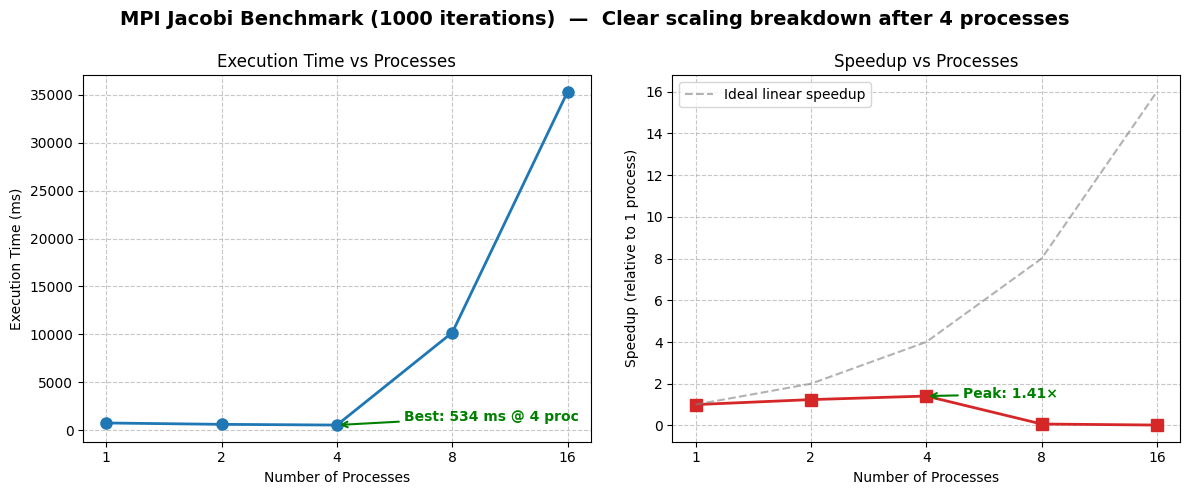

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data from your benchmark
processes = [1, 2, 4, 8, 16]
time_ms   = [750.562, 607.676, 534.050, 10186.307, 35325.371]
speedup   = [1.00,   1.24,   1.41,   0.07,     0.02]

# Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Plot 1: Execution Time
ax1.plot(processes, time_ms, 'o-', color='tab:blue', linewidth=2, markersize=8)
ax1.set_xlabel('Number of Processes')
ax1.set_ylabel('Execution Time (ms)')
ax1.set_title('Execution Time vs Processes')
ax1.grid(True, linestyle='--', alpha=0.7)
ax1.set_xscale('log', base=2)
ax1.set_xticks(processes)
ax1.get_xaxis().set_major_formatter(plt.ScalarFormatter())

# Annotate the best point
ax1.annotate('Best: 534 ms @ 4 proc',
             xy=(4, 534), xytext=(6, 1000),
             arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
             color='green', fontsize=10, weight='bold')

# Plot 2: Speedup
ax2.plot(processes, speedup, 's-', color='tab:red', linewidth=2, markersize=8)
ax2.set_xlabel('Number of Processes')
ax2.set_ylabel('Speedup (relative to 1 process)')
ax2.set_title('Speedup vs Processes')
ax2.grid(True, linestyle='--', alpha=0.7)

# Ideal linear speedup line for reference
ax2.plot(processes, processes, '--', color='gray', alpha=0.6, label='Ideal linear speedup')
ax2.legend()

# Highlight the peak
ax2.annotate('Peak: 1.41×',
             xy=(4, 1.41), xytext=(5, 1.3),
             arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
             color='green', fontsize=10, weight='bold')

# Common title
fig.suptitle('MPI Jacobi Benchmark (1000 iterations)  —  Clear scaling breakdown after 4 processes',
             fontsize=14, weight='bold')

plt.tight_layout()
plt.subplots_adjust(top=0.85)
plt.show()